# CNN model

### Packages

In [3]:
# Packages:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

# Dataload

### Fire data

In [4]:
# Set the path to the folder containing PNG images
folder_path_fire = 'NAIP - 2-7 måneder før brand, 250 meter x 250 meter - NY 2'

In [5]:
# Define the fraction of the data to use for training, validation, and testing
train_fraction = 0.6
val_fraction = 0.2
test_fraction = 0.2

# Initialize lists to store the data
train_images_fire = []
train_labels_fire = []
val_images_fire = []
val_labels_fire = []
test_images_fire = []
test_labels_fire = []

# Loop through all the PNG files in the folder
for filename in os.listdir(folder_path_fire):
    if filename.endswith('.png'):
        # Set the path to the image file
        img_path = os.path.join(folder_path_fire, filename)

        # Open the image file
        img = Image.open(img_path)

        # Convert the image to RGB format
        img = img.convert('RGB')

        # Resize the image to a specific size
        img = img.resize((224, 224))

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Normalize the pixel values
        img_array = img_array / 255.0
        
        # Add the image array and its corresponding label (which is always 1) to the appropriate list
        if len(train_images_fire) < train_fraction * len(os.listdir(folder_path_fire)):
            train_images_fire.append(img_array)
            train_labels_fire.append(1)
        elif len(val_images_fire) < val_fraction * len(os.listdir(folder_path_fire)):
            val_images_fire.append(img_array)
            val_labels_fire.append(1)
        else:
            test_images_fire.append(img_array)
            test_labels_fire.append(1)

# Convert the lists to numpy arrays
X_train_fire = np.array(train_images_fire)
y_train_fire = np.array(train_labels_fire)
X_val_fire = np.array(val_images_fire)
y_val_fire = np.array(val_labels_fire)
X_test_fire = np.array(test_images_fire)
y_test_fire = np.array(test_labels_fire)

In [6]:
print('X_train: ', len(X_train_fire))
print('y_train: ', len(y_train_fire))
print('X_val: ', len(X_val_fire))
print('y_val: ', len(y_val_fire))
print('X_test: ', len(X_test_fire))
print('y_test: ', len(y_test_fire))

X_train:  1106
y_train:  1106
X_val:  369
y_val:  369
X_test:  367
y_test:  367


### No fire data:

In [7]:
# Set the path to the folder containing PNG images
folder_path_nofire = 'NAIP - 2-7 måneder før brand, 250 x 250 meter - Ikke brand'

In [8]:
# Define the fraction of the data to use for training, validation, and testing
train_fraction = 0.6
val_fraction = 0.2
test_fraction = 0.2

# Initialize lists to store the data
train_images_nofire = []
train_labels_nofire = []
val_images_nofire = []
val_labels_nofire = []
test_images_nofire = []
test_labels_nofire = []

# Loop through all the PNG files in the folder
for filename in os.listdir(folder_path_nofire):
    if filename.endswith('.png'):
        # Set the path to the image file
        img_path = os.path.join(folder_path_nofire, filename)

        # Open the image file
        img = Image.open(img_path)

        # Convert the image to RGB format
        img = img.convert('RGB')

        # Resize the image to a specific size
        img = img.resize((224, 224))

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Normalize the pixel values
        img_array = img_array / 255.0
        
        # Add the image array and its corresponding label (which is always 1) to the appropriate list
        if len(train_images_nofire) < train_fraction * len(os.listdir(folder_path_nofire)):
            train_images_nofire.append(img_array)
            train_labels_nofire.append(0)
        elif len(val_images_nofire) < val_fraction * len(os.listdir(folder_path_nofire)):
            val_images_nofire.append(img_array)
            val_labels_nofire.append(0)
        else:
            test_images_nofire.append(img_array)
            test_labels_nofire.append(0)

# Convert the lists to numpy arrays
X_train_nofire = np.array(train_images_nofire)
y_train_nofire = np.array(train_labels_nofire)
X_val_nofire = np.array(val_images_nofire)
y_val_nofire = np.array(val_labels_nofire)
X_test_nofire = np.array(test_images_nofire)
y_test_nofire = np.array(test_labels_nofire)

In [9]:
print('X_train: ', len(X_train_nofire))
print('y_train: ', len(y_train_nofire))
print('X_val: ', len(X_val_nofire))
print('y_val: ', len(y_val_nofire))
print('X_test: ', len(X_test_nofire))
print('y_test: ', len(y_test_nofire))

X_train:  1108
y_train:  1108
X_val:  370
y_val:  370
X_test:  368
y_test:  368


## Combine the two datasets into one:

In [10]:
X_train = np.concatenate((X_train_fire, X_train_nofire))
y_train = np.concatenate((y_train_fire, y_train_nofire))

X_val = np.concatenate((X_val_fire, X_val_nofire))
y_val = np.concatenate((y_val_fire, y_val_nofire))

X_test = np.concatenate((X_test_fire, X_test_nofire))
y_test = np.concatenate((y_test_fire, y_test_nofire))

In [11]:
print('X_train: ', len(X_train))
print('y_train: ', len(y_train))
print('X_val: ', len(X_val))
print('y_val: ', len(y_val))
print('X_test: ', len(X_test))
print('y_test: ', len(y_test))

X_train:  2214
y_train:  2214
X_val:  739
y_val:  739
X_test:  735
y_test:  735


# Baseline CNN model (percentage output)

In [12]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [13]:
model = tf.keras.Sequential([
    # Convolutional layer 1 with 32 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer 1 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 2 with 64 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Max pooling layer 2 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 3 with 128 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Max pooling layer 3 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Flatten layer to transform 3D tensor to a 1D tensor
    tf.keras.layers.Flatten(),
    # Dense layer 1 with 512 neurons, activation function ReLU
    tf.keras.layers.Dense(512, activation='relu'),
    # Dense layer 2 with 2 neurons (output layer), activation function softmax (multi-class classification)
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxP

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10


2023-04-19 15:46:54.552563: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


70/70 [==============================] - 14s 187ms/step - loss: 0.8500 - accuracy: 0.6134 - val_loss: 0.5791 - val_accuracy: 0.6725
Epoch 2/10
70/70 [==============================] - 10s 136ms/step - loss: 0.4999 - accuracy: 0.7647 - val_loss: 0.4977 - val_accuracy: 0.7767
Epoch 3/10
70/70 [==============================] - 9s 134ms/step - loss: 0.4712 - accuracy: 0.7832 - val_loss: 0.4057 - val_accuracy: 0.8254
Epoch 4/10
70/70 [==============================] - 9s 136ms/step - loss: 0.4426 - accuracy: 0.7981 - val_loss: 0.5995 - val_accuracy: 0.7131
Epoch 5/10
70/70 [==============================] - 9s 132ms/step - loss: 0.4015 - accuracy: 0.8202 - val_loss: 0.4305 - val_accuracy: 0.8214
Epoch 6/10
70/70 [==============================] - 9s 132ms/step - loss: 0.3762 - accuracy: 0.8388 - val_loss: 0.4104 - val_accuracy: 0.8336
Epoch 7/10
70/70 [==============================] - 9s 132ms/step - loss: 0.3585 - accuracy: 0.8369 - val_loss: 0.3678 - val_accuracy: 0.8620
Epoch 8/10
70/7

In [52]:
# save the model
model.save('CNN_precentage.h5')

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

23/23 [==============================] - 2s 50ms/step - loss: 0.4769 - accuracy: 0.8218
Test accuracy: 0.8217687010765076


In [16]:
import numpy as np

# predict on test set
y_pred = model.predict(X_test)

# apply softmax to get probabilities
y_pred_prob = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), 1, y_pred)

# print probabilities
print(y_pred_prob)

23/23 [==============================] - 1s 45ms/step
[[0.2721328  0.7278672 ]
 [0.26896375 0.73103625]
 [0.26971415 0.7302859 ]
 ...
 [0.72547925 0.27452078]
 [0.6905048  0.30949515]
 [0.72475183 0.27524814]]


In [17]:
y_test # 0 = no fire, 1 = fire 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
y_test.shape

(735, 2)

In [19]:
y_pred_prob.shape

(735, 2)

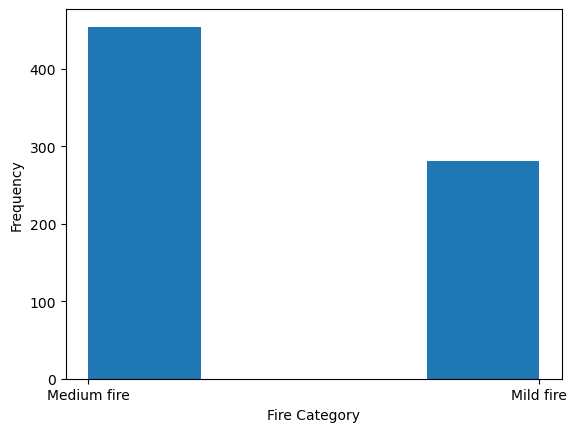

In [23]:
# Assuming y_pred_prob is a numpy array of predicted probabilities
categories = []
for prob in y_pred_prob:
    if prob[1] < 0.25:
        categories.append('No fire')
    elif prob[1] < 0.50:
        categories.append('Mild fire')
    elif prob[1] < 0.75:
        categories.append('Medium fire')
    else:
        categories.append('Big fire')

# Plot a bar chart of the categories
plt.hist(categories, bins=4)
plt.xlabel('Fire Category')
plt.ylabel('Frequency')
plt.show()

In [24]:
categories

['Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Me

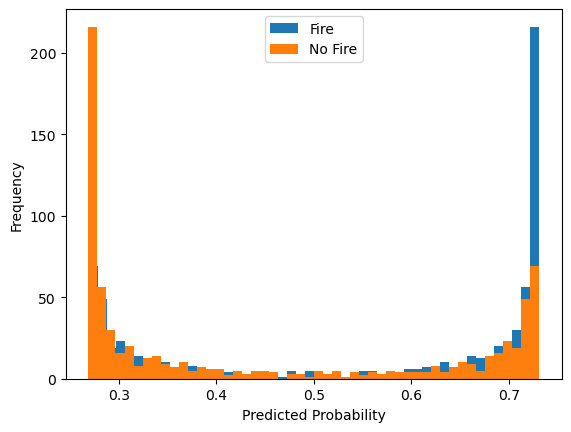

In [22]:
import matplotlib.pyplot as plt

# assuming y_pred_prob is a numpy array of predicted probabilities
plt.hist(y_pred_prob[:, 1], bins=50, label='Fire')
plt.hist(y_pred_prob[:, 0], bins=50, label='No Fire')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

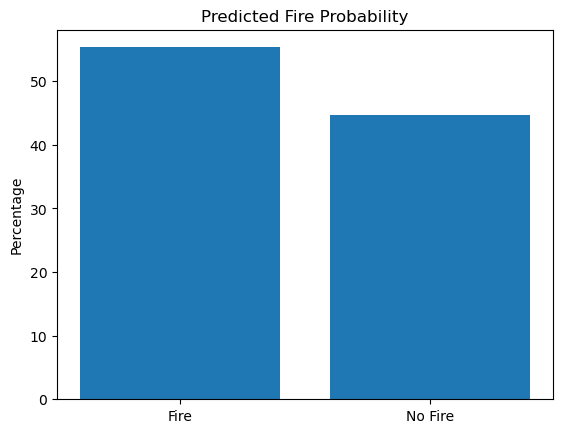

In [21]:
import matplotlib.pyplot as plt

# Get percentages of fire and no fire from y_pred_prob
fire_percent = y_pred_prob.mean(axis=0)[1] * 100
no_fire_percent = y_pred_prob.mean(axis=0)[0] * 100

# Create a bar chart
plt.bar(['Fire', 'No Fire'], [fire_percent, no_fire_percent])
plt.ylabel('Percentage')
plt.title('Predicted Fire Probability')
plt.show()

# Hyperparameter tunning 

In [ ]:
# Define the hyperparameters to tune
params = {
    'learning_rate': np.linspace(0.001, 0.01, 10),
    'dropout_rate': np.linspace(0.1, 0.5, 5),
    'kernel_size': [(3, 3), (5, 5), (7, 7)],
    'filters': [16, 32, 64],
    'hidden_units': [64, 128, 256],
}

# Define a function that creates a new model based on the given hyperparameters
def create_model(learning_rate, dropout_rate, kernel_size, filters, hidden_units):
    model = models.Sequential()
    model.add(layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Flatten())
    model.add(layers.Dense(hidden_units, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(2, activation='softmax'))
    opt = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for the create_model function
keras_clf = KerasClassifier(build_fn=create_model)

# Define the random search object
search = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=params,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search object to the training data
search.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


/var/folders/29/htf_t1pj3m381k851l3xs9_h0000gn/T/ipykernel_6594/2901422500.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn=create_model)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro


Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro


Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro


# Grad-cam

In [35]:
import torch
from torch.nn import functional as F
import cv2
import numpy as np

In [36]:
def gradcam(model, img_tensor, target_class):
    # Set model to evaluation mode
    model.eval()

    # Get feature map weights from last convolutional layer
    final_conv_layer = model.features[-1]
    grads = torch.autograd.grad(outputs=model(img_tensor), 
                                inputs=final_conv_layer.weight,
                                grad_outputs=torch.ones_like(model(img_tensor)),
                                create_graph=True, retain_graph=True)[0]
    pooled_grads = torch.mean(grads, dim=(2, 3))

    # Get feature map activations
    activations = final_conv_layer(img_tensor).detach()
    activations = F.relu(activations)

    # Compute weights based on gradient importance
    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_grads[:, i].unsqueeze(1).unsqueeze(2)

    # Average feature map activations to obtain class activation map
    cam = torch.mean(activations, dim=1).squeeze().cpu().numpy()
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()

    # Upsample to original image size
    img = img_tensor.squeeze().permute(1, 2, 0).cpu().numpy()
    cam = cv2.resize(cam, (img.shape[1], img.shape[0]))
    cam = np.uint8(255 * cam)
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return cam

### Find example image

In [51]:
img_path = 'NAIP - 2-7 måneder før brand, 250 meter x 250 meter - NY 2/03-711178-04.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_tensor = torch.tensor(img).unsqueeze(0).permute(0, 3, 1, 2).float().cuda()

AssertionError: Torch not compiled with CUDA enabled

In [57]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load an image and resize it to (224, 224)
img = load_img('NAIP - 2-7 måneder før brand, 250 meter x 250 meter - NY 2/03-711178-04.png', target_size=(224, 224))

# Convert the image to a NumPy array with shape (1, 224, 224, 3)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255.

# Pass the image through the model and get the output of the last convolutional layer
last_conv_layer = model.get_layer('conv2d_2')
last_conv_output = last_conv_layer(x)


ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected axis -1 of input shape to have value 64, but received input with shape (1, 224, 224, 3)

In [56]:
import tensorflow as tf
import numpy as np
import cv2

# Load your trained model
model = tf.keras.models.load_model('CNN_precentage.h5')

# Get the output of the last convolutional layer
last_conv_layer = model.get_layer('conv2d_2')

# Define a function to generate a heatmap for a given image
def generate_heatmap(img_array):
    # Expand the dimensions of the image array to match the input shape of the model
    expanded_img_array = np.expand_dims(img_array, axis=0)

    # Create a GradientTape to record the operations performed on the input image
    with tf.GradientTape() as tape:
        # Get the activations of the last convolutional layer for the input image
        last_conv_activations = last_conv_layer(expanded_img_array)

        # Watch the last convolutional layer activations to compute the gradients with respect to them
        tape.watch(last_conv_activations)

        # Get the predicted output of the model for the input image
        pred = model(expanded_img_array)

        # Get the predicted probability of the input image belonging to the class of interest
        pred_prob = pred[0][1]

    # Get the gradients of the predicted probability with respect to the last convolutional layer activations
    grads = tape.gradient(pred_prob, last_conv_activations)

    # Compute the mean intensity of the gradients over each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_activations), axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    # Convert the heatmap to a numpy array
    heatmap = heatmap.numpy()

    # Resize the heatmap to match the size of the input image
    heatmap = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))

    # Convert the heatmap to RGB format
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Overlay the heatmap onto the original image
    overlaid_img = cv2.addWeighted(img_array, 0.5, heatmap, 0.5, 0)

    return overlaid_img

# Generate a heatmap for an example image
example_img = X_test[0]
heatmap = generate_heatmap(example_img)

# Display the original image and the heatmap side by side
cv2.imshow('Original Image', example_img)
cv2.imshow('Heatmap', heatmap)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected axis -1 of input shape to have value 64, but received input with shape (1, 224, 224, 3)

# Baseline

In [ ]:
model = tf.keras.Sequential([
    # Convolutional layer 1 with 32 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer 1 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 2 with 64 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Max pooling layer 2 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 3 with 128 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Max pooling layer 3 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Flatten layer to transform 3D tensor to a 1D tensor
    tf.keras.layers.Flatten(),
    # Dense layer 1 with 512 neurons, activation function ReLU
    tf.keras.layers.Dense(512, activation='relu'),
    # Dense layer 2 with 1 neuron (output layer), activation function sigmoid (binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# CNN with pretrained model: Resnet 50

In [ ]:
# Create an instance of the ResNet50 model and specify the input shape to match the images
resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Include_top=False means that we don't include the top fully connected layers of the
#ResNet50 model (which are meant for ImageNet classification)

# Freeze the layers of the ResNet50 model to prevent their weights from being updated during training (common technique)
for layer in resnet_model.layers:
    layer.trainable = False


# Add own layers on top of the ResNet50 model (maybe necessary )
model = tf.keras.Sequential([
    resnet_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and an optimizer of your choice
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train and evaluate the model using on data:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# CNN with pretrained model: InceptionV3

In [ ]:
# Create an instance of the InceptionV3 model and specify the input shape to match the images
inception_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the InceptionV3 model to prevent their weights from being updated during training
for layer in inception_model.layers:
    layer.trainable = False

# Add own layers on top of the InceptionV3 model
model = tf.keras.Sequential([
    inception_model,
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and an optimizer of your choice
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Train and evaluate the model using on data:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Why is the CNN better than CNN with ResNet 50?

If your dataset is small and similar to the original dataset used to train the pre-trained model, using a simple CNN may be sufficient and even outperform the pre-trained model. In this case, the pre-trained model may overfit on your small dataset and not generalize well to new images.